Neural Network Classification Model

> Binary Classification
> Multiclass Classification
> Multilabel classification



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
from sklearn.datasets import make_circles

In [3]:
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise= 0.03, random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
# Visualize the data
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


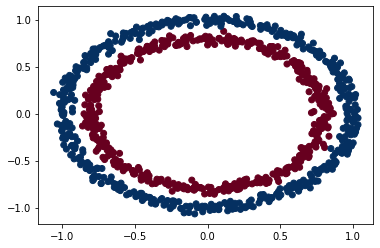

In [7]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# Check number of samples
len(X), len(y)

(1000, 1000)

In [10]:
X[17], y[17]

(array([ 0.1070617, -0.7930922]), 1)

Steps in Modelling

In [11]:
tf.random.set_seed(42)

# Build layers into the model
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(2)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#Fit the model
model_1.fit(X, y, epochs= 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 3.1363 - accuracy: 0.4890
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.8241 - accuracy: 0.4790
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7311 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6998 - accuracy: 0.5050


In [12]:
# Improve the model by training for longer
model_1.fit(X, y, epochs = 200, verbose=False)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5760


[0.6935638189315796, 0.5759999752044678]

### The model seems to be guessing since it's performing around 50% accuracy

##### Improving our model



In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs= 100, verbose=0)

In [14]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4820


[0.6931542158126831, 0.4819999933242798]

In [15]:
# Let create a function that will help visualize

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create x values
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together.

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape predictions for plotting
    y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdBu, alpha= 0.7)
    plt.scatter(X[:, 0], X[:, 1], c= y, s=40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [18]:
# Can this model be used for a regression problem
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_regression, y_regression

# Split our regression data into training and test set
X_reg_train = X_regression[: 150]
X_reg_test = X_regression[150:]
y_reg_train = X_regression[:150]
y_reg_test = X_regression[150: ]

# Fit the model
model_2.fit(X_reg_train, y_reg_train)

ValueError: ignored

The model is for a binary classification probem hence the error for a regression problem 

In [20]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_4.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model_4.fit(X_reg_train, y_reg_train, epochs= 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 148.2158 - mae: 148.2158
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 40.6552 - mae: 40.6552
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 28.4548 - mae: 28.4548
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 13.7264 - mae: 13.7264
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 24.5753 - mae: 24.5753
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 10.4157 - mae: 10.4157
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 9.1379 - mae: 9.1379
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 9.2649 - mae: 9.2649
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 5.0359 - mae: 5.0359
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 3.1257 - mae: 3.1257
Epoch 11/100
5/5 [==============================] - 0s 2ms/step -

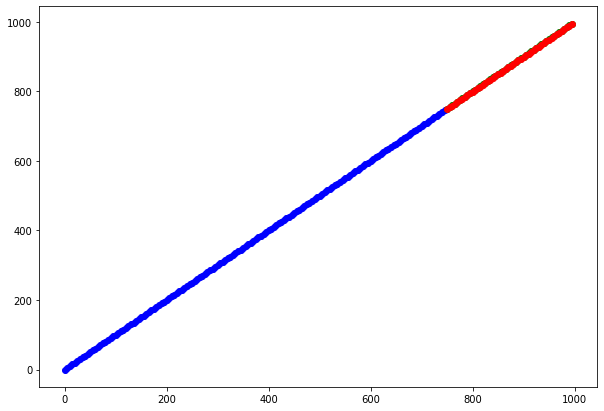

In [21]:
y_reg_pred = model_4.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c= 'b', label= 'Training data')
plt.scatter(X_reg_test, y_reg_test, c= 'g', label = 'Test data')
plt.scatter(X_reg_test, y_reg_pred, c='r', label = 'Prediction')

The missing piece in our first model is 'linearity'

In [22]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss= 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_5.fit(X, y, epochs= 200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

doing binary classification


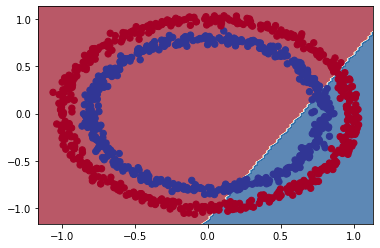

In [23]:
plot_decision_boundary(model=model_5, X=X, y=y)

In [24]:
### Replicate a multi-layer neural network from Tensorflow Playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1)
])

model_6.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_6.fit(X, y, epochs= 250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [25]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 994us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


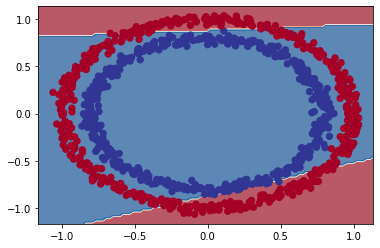

In [26]:
plot_decision_boundary(model_6, X, y)

In [27]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_7.fit(X, y, epochs= 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [28]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification


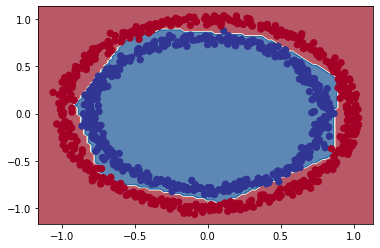

In [29]:
plot_decision_boundary(model_7, X, y)

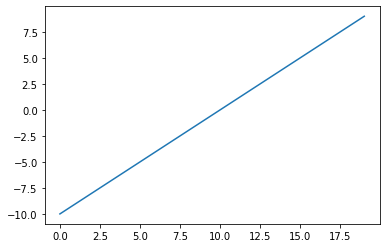

In [30]:
# Create a toy tensor 

A = tf.cast(tf.range(-10, 10), tf.float32)

plt.plot(A)

In [31]:
def sigmoid(x):
  return 1/ (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

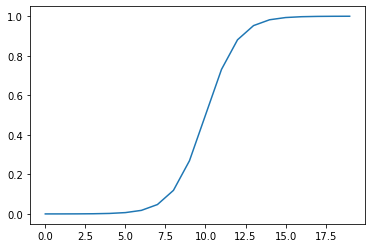

In [32]:
plt.plot(sigmoid(A))

In [33]:
# Recreate the relu function

def relu(x):
  return tf.maximum(0, x)

In [34]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

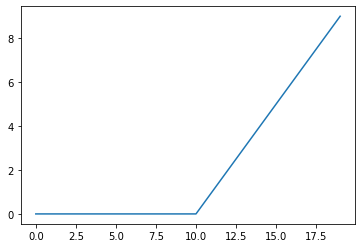

In [35]:
plt.plot(relu(A))

In [36]:
# Creating a Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

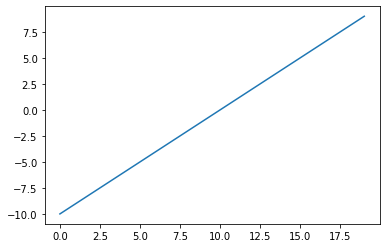

In [37]:
plt.plot(tf.keras.activations.linear(A))

In [38]:
# Create a Train and Test set from the data

X_train, y_train = X[: 800], y[: 800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [39]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')

])

model_8.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ['accuracy'])

history = model_8.fit(X_train, y_train, epochs = 25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [40]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


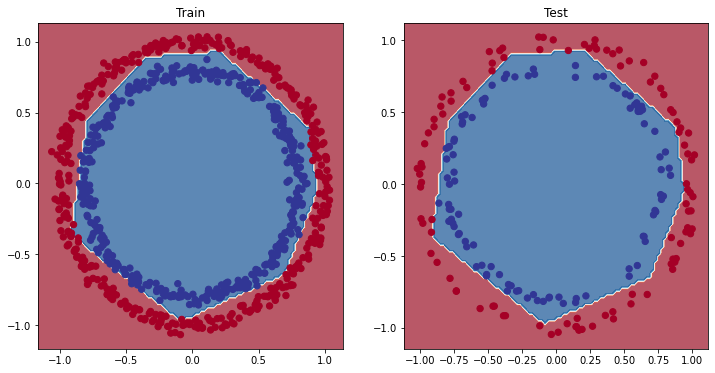

In [41]:
# Plot the decision boundaries for the data

plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y= y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y= y_test)

Plot the history

In [42]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

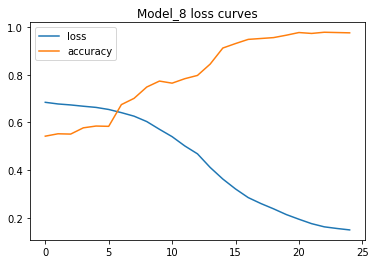

In [43]:
#Plot the loss curves

pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

## Finding the best learninig rate (where the loss decreases the most during training)

- A learning rate **callback**
- Another model
- A modified loss curve plot

In [44]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')

])

model_9.compile(loss='binary_crossentropy',
                optimizer = "Adam",
                metrics = ['accuracy']
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

#Fit the model
history_9 = model_9.fit(
    X_train, y_train, epochs= 100, 
    callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

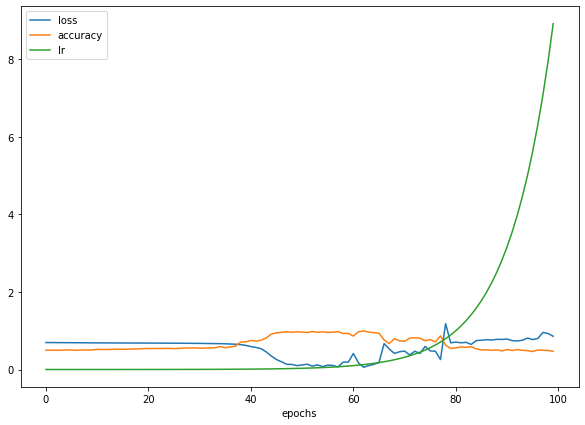

In [45]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel = 'epochs')

Text(0.5, 1.0, 'Learning Rate vs. Loss')

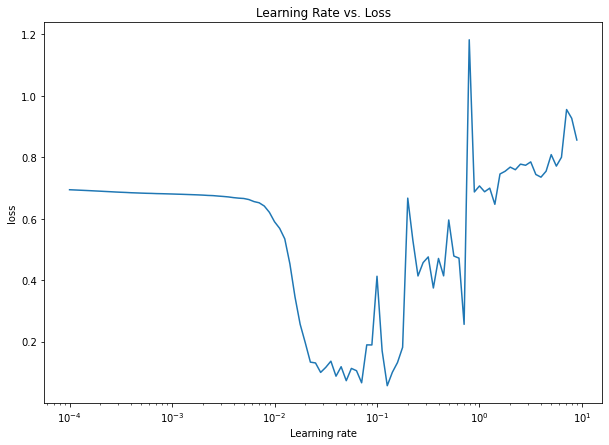

In [46]:
# Plotting learning rate versus the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('loss')
plt.title('Learning Rate vs. Loss')

In [47]:
# Other typical learning rates

10 ** 0, 10**-1 , 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [48]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, 'sigmoid')

])

model_10.compile(loss= 'binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics = ['accuracy'])

history_10 = model_10.fit(X_train, y_train, epochs= 20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [49]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [50]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


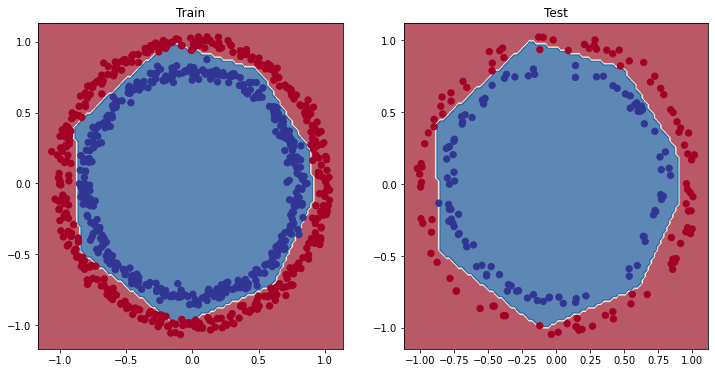

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.title('Train')
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)

Classification Evaluation 

Accuracy
Precision
Recall
F1-score
Confusion Matrix
Classification Matrix

In [52]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00%


In [54]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, y_preds)

ValueError: ignored

In [55]:
# Convert predictions probabilities to binary format 
tf.round(y_preds)[: 10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [56]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

#### Making the confusion the matrix look pretty

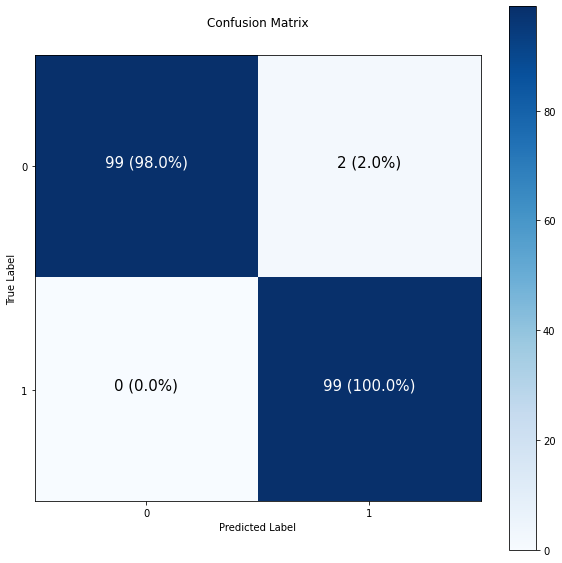

In [57]:
import itertools

figsize = (10, 10)

cm  = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Make it look pretty
fig, ax = plt.subplots(figsize= figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label th axes
ax.set(title= 'Confusion Matrix',
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis label to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
           horizontalalignment = 'center',
           color= 'white' if cm[i, j] > threshold else "black",
           size=15
           )

In [58]:
# Turn into a function
def plot_confusion_matrix():
  pass

# Working with a Larger Example (A multiclass classification)

In [59]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has been sorted into train and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [60]:
print(f"Training sample:\n{train_data}")
print(f"Test sample: \n{train_labels}")

Training sample:
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Test sample: 
[9 0 0 ... 3 0 5]


In [61]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

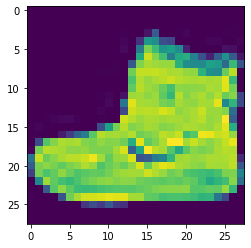

In [62]:
# Plot a single sample

plt.imshow(train_data[0])

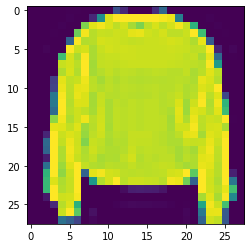

In [63]:
plt.imshow(train_data[7])

In [64]:
train_labels[7]

2

In [65]:
# Create a small list so we can index onto our training labels so they're human readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

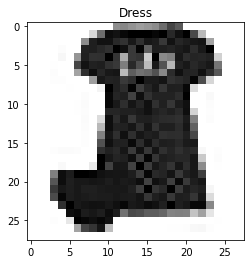

In [66]:
#Plot an example image and its label
index_of_choice = 70

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

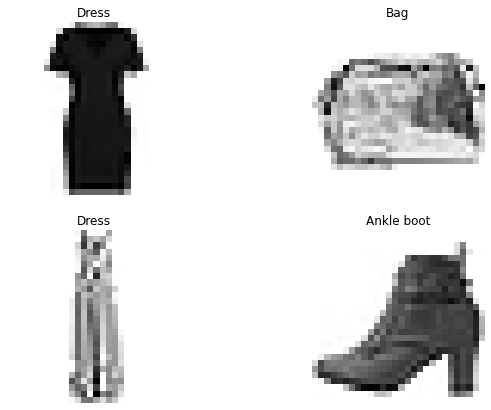

In [67]:
import random
plt.figure(figsize= (10,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a multiclass classification

For our multiclass classification model, we can use a simiar architecture to our binary classifiers.

* input shape = 28 x 28
* output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output activation = softmax

In [68]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [69]:
train_labels[: 10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [70]:
train_data[0].shape

(28, 28)

In [71]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

non_norm_history = model_11.fit(train_data, 
                                tf.one_hot(train_labels, depth=10),
                                epochs = 10,
                                validation_data = (test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [72]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [73]:
#Check the min and max values of the train data

train_data.min(), train_data.max()

(0, 255)

In [74]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [75]:
# Build a model to find patterns in the normalized data
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

norm_history = model_12.fit(train_data_norm, 
                                tf.one_hot(train_labels, depth=10),
                                epochs = 10,
                                validation_data = (test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

####Neural Network prefers normalized data.

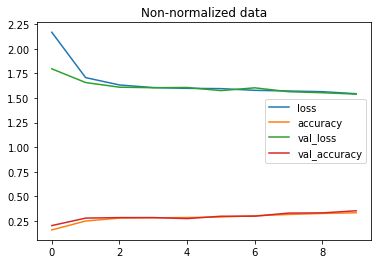

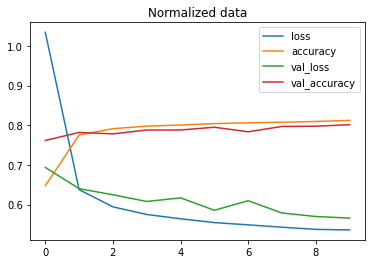

In [76]:
pd.DataFrame(non_norm_history.history).plot(title = 'Non-normalized data')
pd.DataFrame(norm_history.history).plot(title = 'Normalized data')

### Finding the ideal learning rate

In [77]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')

])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

#Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10** (epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs= 40, 
                               validation_data = (test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Findig the ideal learning rate')

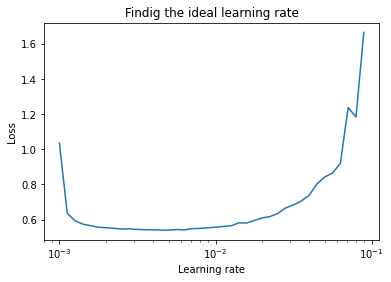

In [78]:
# Plot the learning rate decay curve

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title("Findig the ideal learning rate")

In [79]:
# Let's refit the model with the ideal learning rate

tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28, 28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')

])

model_14.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics= ['accuracy'])

history_14 = model_14.fit(train_data_norm, train_labels, epochs=40, validation_data =(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

# Evaluating our multiclass classification model

> Evaluate performance using other classification metrics

> Access some of its predictions

> Improve its result by training for longer

> Save and export for use in application

In [80]:
# Create a confusion matrix

import itertools

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes= None, figsize= (10, 10), text_size= 15):

  cm  = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Make it look pretty
  fig, ax = plt.subplots(figsize= figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

  # Label the axes
  ax.set(title= 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis label to the bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
            horizontalalignment = 'center',
            color= 'white' if cm[i, j] > threshold else "black",
            size=15
            )

In [81]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [82]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)

#View the first 5 predictions
y_probs[: 5]

array([[1.78801834e-10, 8.59335103e-11, 1.46917664e-05, 5.13161808e-07,
        1.81152336e-05, 2.97060341e-01, 4.20026289e-08, 4.38645892e-02,
        4.03015967e-03, 6.55011594e-01],
       [1.65367328e-05, 3.77228664e-16, 9.07316446e-01, 7.29073406e-07,
        2.47242767e-02, 4.15087470e-17, 6.74995705e-02, 0.00000000e+00,
        4.42385790e-04, 1.77472556e-15],
       [4.33511450e-05, 9.98505235e-01, 1.06210706e-07, 1.42850075e-03,
        1.54846366e-05, 6.91499768e-22, 7.37811524e-06, 1.22946607e-16,
        5.29575495e-08, 6.05440481e-12],
       [4.30087748e-05, 9.96566236e-01, 7.15737315e-07, 3.24998843e-03,
        1.19078315e-04, 2.16415290e-19, 2.04281223e-05, 5.03702372e-14,
        6.17275475e-07, 1.14019505e-09],
       [1.47298977e-01, 2.39545761e-06, 1.33107737e-01, 1.01817297e-02,
        3.32404375e-02, 4.55808943e-18, 6.75670624e-01, 2.75189509e-29,
        4.98094480e-04, 1.62312739e-14]], dtype=float32)

**Note** Make predictions on the same kind of data your data was trained on.

In [83]:
y_probs[0], y_probs[0].argmax(), class_names[tf.argmax(y_probs[0])]

(array([1.7880183e-10, 8.5933510e-11, 1.4691766e-05, 5.1316181e-07,
        1.8115234e-05, 2.9706034e-01, 4.2002629e-08, 4.3864589e-02,
        4.0301597e-03, 6.5501159e-01], dtype=float32), 9, 'Ankle boot')

In [84]:
y_preds = y_probs.argmax(axis=1)

y_preds[: 10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(test_labels, y_preds)

array([[833,  13,  11,  54,   3,   2,  73,   0,  11,   0],
       [  6, 950,   1,  26,   5,   1,  11,   0,   0,   0],
       [ 42,   1, 593,   8, 164,   1, 178,   0,  13,   0],
       [ 74,  27,  10, 787,  35,   1,  56,   2,   8,   0],
       [  2,   1,  83,  29, 728,   0, 150,   0,   7,   0],
       [  0,   1,   0,   0,   0, 941,   0,  34,   3,  21],
       [217,   9, 117,  34,  98,   3, 505,   0,  17,   0],
       [  0,   0,   0,   0,   0,  70,   0, 905,   0,  25],
       [ 16,   1,  32,  19,   5,   9,   8,   5, 905,   0],
       [  0,   0,   0,   0,   1,  36,   0,  48,   5, 910]])

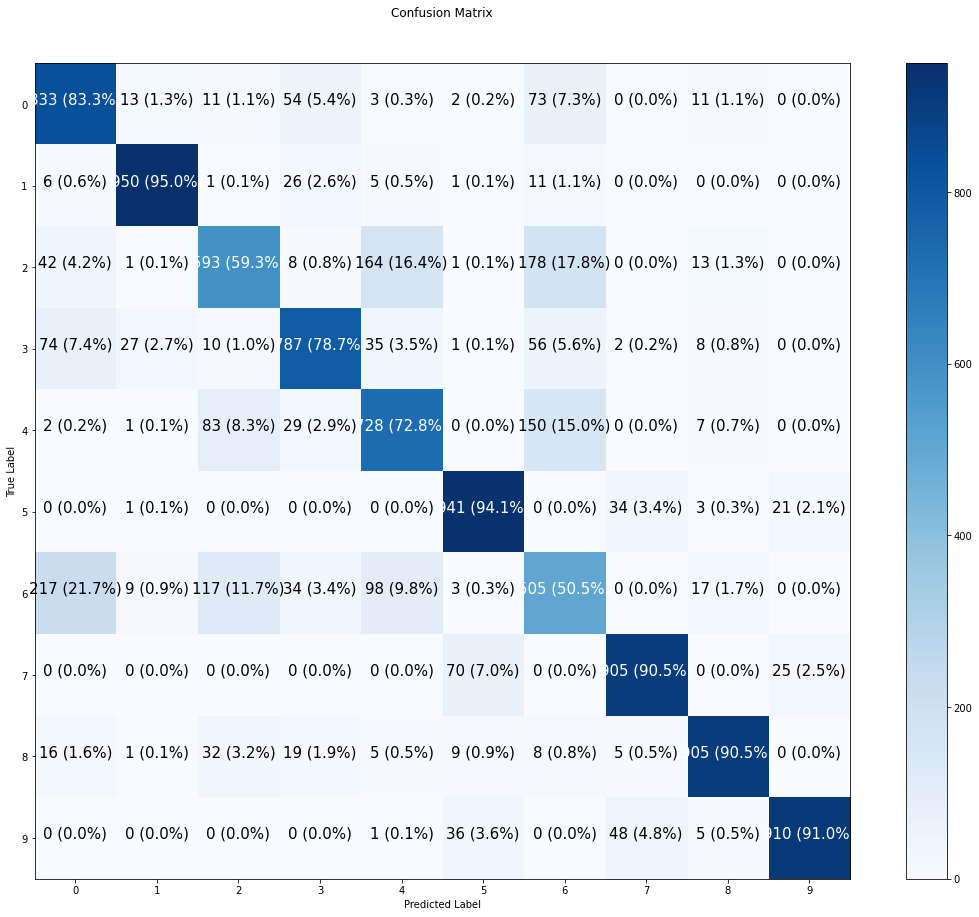

In [87]:
#Make a better confusion matrix

make_confusion_matrix(y_true=test_labels, y_pred= y_preds, classes= class_names, 
                      figsize=(20, 15), text_size=10)

In [88]:
import random

def random_image(model, images, true_labels, classes):
  'picks a random image and labels it with the prediction and true label'
  i = random.randint(0, len(images))

  # Prediction and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)  

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                  100 * tf.reduce_max(pred_probs),
                                                  true_label),
             color = color) # use the color code to determine the wrong and right prediction.

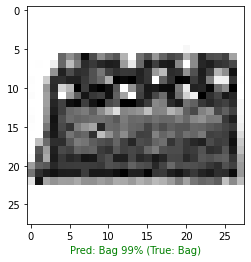

In [89]:
random_image(model= model_14, images = test_data_norm, true_labels = test_labels, classes= class_names)

In [90]:
# Find the layers in our model

model_14.layers

In [91]:
# Extract a particular layer
model_14.layers[1]

In [92]:
# Get the weights of a layer

weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[ 1.5936174 , -0.76976854, -1.5807068 , -1.9991511 ],
        [ 0.45609504, -1.2976133 , -0.7302893 , -0.16224061],
        [ 1.348038  , -0.19881976, -1.9888442 , -1.2137522 ],
        ...,
        [-0.22335076,  0.59402996, -0.272626  ,  0.4604269 ],
        [-0.21883878,  1.1971763 ,  0.5428994 , -0.5791032 ],
        [ 0.37653425, -0.19791599,  0.02285609,  0.24255323]],
       dtype=float32), (784, 4))

In [93]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_39 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Inspecting the bias

biases, biases.shape

(array([ 0.3281791 , -0.01041772, -0.1584291 ,  1.2009073 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these biases pair with a weight matrix. Bias vectors gets initialized at zero.

The bias vector dictates how much patterns with their weights should influence the next layer.

In [95]:
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_39 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


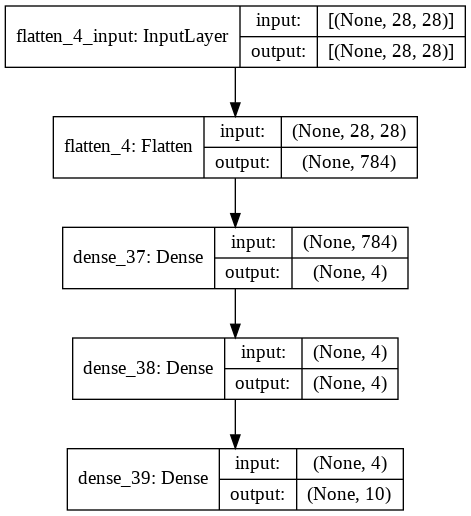

In [96]:
# Viewing tensorflow model

from tensorflow.keras.utils import plot_model
# Check the inputs and outputs of each layer.
plot_model(model_14, show_shapes = True)